### 作业三


#### 一、以`softmax-regression-concise.ipynb`为例, 完成下列问题。
1. `net`的输入`x`和输出`y_hat`的维度是什么？
2. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。
3. 增加迭代周期的数量。为什么测试精度会在一段时间后降低？有什么办法可以解决这个问题？
4. 将输入`x`的宽和高调整为 $64 \times 64$, 查看试验结果。

1、![image](./shape.jpg)  

the x's shape is [batch , 1, 28, 28]
the y's shape is [batch_size , 10]


3、 可以通过在测试集合其精度不再提升的时候提前停止训练，也可以通过L2正则化的方式进行权重衰减的方式稳定其精确度



Running experiment: Default
Epoch 1/10:
  Training loss: 0.6885
  Validation loss: 0.5741
Epoch 2/10:
  Training loss: 0.5220
  Validation loss: 0.5331
Epoch 3/10:
  Training loss: 0.4870
  Validation loss: 0.5155
Epoch 4/10:
  Training loss: 0.4687
  Validation loss: 0.4871
Epoch 5/10:
  Training loss: 0.4555
  Validation loss: 0.4832
Epoch 6/10:
  Training loss: 0.4486
  Validation loss: 0.4857
Epoch 7/10:
  Training loss: 0.4414
  Validation loss: 0.4649
Epoch 8/10:
  Training loss: 0.4363
  Validation loss: 0.4701
Epoch 9/10:
  Training loss: 0.4321
  Validation loss: 0.4671
Epoch 10/10:
  Training loss: 0.4283
  Validation loss: 0.4589

Running experiment: Smaller batch
Epoch 1/10:
  Training loss: 0.6232
  Validation loss: 0.5951
Epoch 2/10:
  Training loss: 0.4910
  Validation loss: 0.5263
Epoch 3/10:
  Training loss: 0.4637
  Validation loss: 0.4889
Epoch 4/10:
  Training loss: 0.4502
  Validation loss: 0.5015
Epoch 5/10:
  Training loss: 0.4421
  Validation loss: 0.5018
Epoch

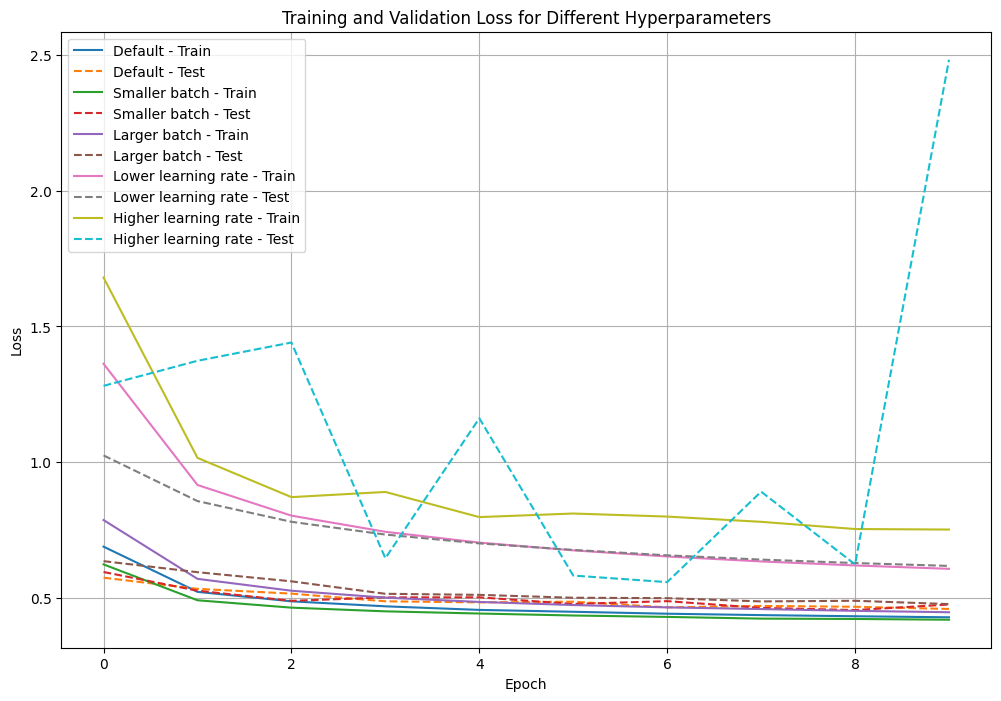

In [1]:
# 第二个问题:

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

def train_model(batch_size, num_epochs, learning_rate):
    # Load data
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    
    # Define model
    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
    
    # Initialize weights
    def init_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    
    net.apply(init_weights)
    
    # Define loss function and optimizer
    loss_func = nn.CrossEntropyLoss(reduction='none')
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    
    # Training
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        # Training
        train_loss_sum = 0
        train_batch_count = 0
        
        for x, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(x)
            loss = loss_func(y_hat, y)
            loss.mean().backward()
            optimizer.step()
            train_loss_sum += loss.mean().detach().numpy()
            train_batch_count += 1
        
        avg_train_loss = train_loss_sum / train_batch_count
        train_losses.append(avg_train_loss)
        
        # Validation
        test_loss_sum = 0
        test_batch_count = 0
        
        for x_val, y_val in test_iter:
            y_pre = net(x_val)
            loss_val = loss_func(y_pre, y_val)
            test_loss_sum += loss_val.mean().detach().numpy()
            test_batch_count += 1
        
        avg_test_loss = test_loss_sum / test_batch_count
        test_losses.append(avg_test_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  Training loss: {avg_train_loss:.4f}')
        print(f'  Validation loss: {avg_test_loss:.4f}')
    
    return train_losses, test_losses

# Experiment with different hyperparameters
experiments = [
    {'batch_size': 128, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Default'},
    {'batch_size': 64, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Smaller batch'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.1, 'label': 'Larger batch'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.01, 'label': 'Lower learning rate'},
    {'batch_size': 256, 'num_epochs': 10, 'learning_rate': 0.5, 'label': 'Higher learning rate'}
]

# Run experiments and plot results
plt.figure(figsize=(12, 8))

for exp in experiments:
    print(f"\nRunning experiment: {exp['label']}")
    train_losses, test_losses = train_model(
        exp['batch_size'], 
        exp['num_epochs'], 
        exp['learning_rate']
    )
    
    plt.plot(train_losses, label=f"{exp['label']} - Train")
    plt.plot(test_losses, label=f"{exp['label']} - Test", linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.savefig('hyperparameter_experiments.png')
plt.show() 


实验1：使用原始大小 (28×28)


100%|██████████| 26.4M/26.4M [00:19<00:00, 1.35MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 105kB/s]
100%|██████████| 4.42M/4.42M [00:03<00:00, 1.33MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.35MB/s]


Epoch 1/10:
  训练损失: 0.7854, 训练准确率: 74.64%
  验证损失: 0.6359, 验证准确率: 78.21%
Epoch 2/10:
  训练损失: 0.5708, 训练准确率: 81.32%
  验证损失: 0.5626, 验证准确率: 80.52%
Epoch 3/10:
  训练损失: 0.5265, 训练准确率: 82.53%
  验证损失: 0.5306, 验证准确率: 82.03%
Epoch 4/10:
  训练损失: 0.5000, 训练准确率: 83.26%
  验证损失: 0.5150, 验证准确率: 82.33%
Epoch 5/10:
  训练损失: 0.4854, 训练准确率: 83.77%
  验证损失: 0.5087, 验证准确率: 82.51%
Epoch 6/10:
  训练损失: 0.4743, 训练准确率: 84.02%
  验证损失: 0.4932, 验证准确率: 82.85%
Epoch 7/10:
  训练损失: 0.4657, 训练准确率: 84.26%
  验证损失: 0.4891, 验证准确率: 83.11%
Epoch 8/10:
  训练损失: 0.4575, 训练准确率: 84.53%
  验证损失: 0.5012, 验证准确率: 81.87%
Epoch 9/10:
  训练损失: 0.4516, 训练准确率: 84.56%
  验证损失: 0.4811, 验证准确率: 82.91%
Epoch 10/10:
  训练损失: 0.4468, 训练准确率: 84.76%
  验证损失: 0.4753, 验证准确率: 83.50%

实验2：使用调整后的大小 (64×64)
Epoch 1/10:
  训练损失: 1.8860, 训练准确率: 70.04%
  验证损失: 1.6787, 验证准确率: 73.99%
Epoch 2/10:
  训练损失: 1.1434, 训练准确率: 77.34%
  验证损失: 0.8986, 验证准确率: 75.93%
Epoch 3/10:
  训练损失: 0.9731, 训练准确率: 79.33%
  验证损失: 0.9480, 验证准确率: 78.22%
Epoch 4/10:
  训练损失: 0.9733, 训练准确率: 79.46%

C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.tight_layout()
C:\Users\sun\AppData\Local\Temp\ipykernel_23944\3161719517.py:189: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing fr

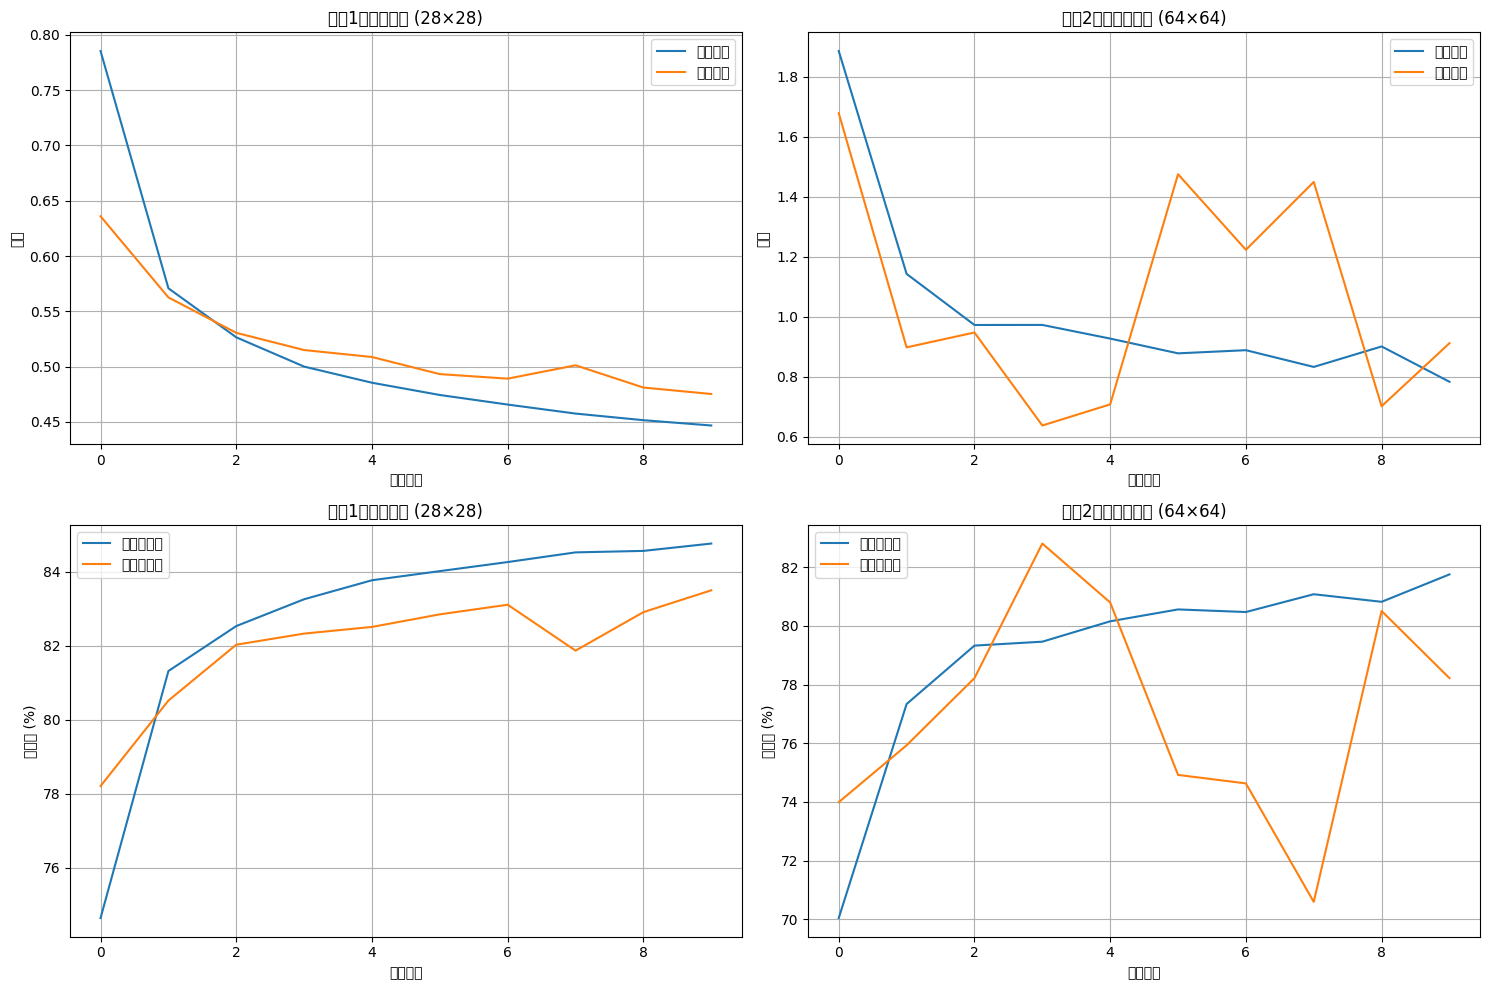


结果比较：
原始大小 (28×28) - 最终训练准确率: 84.76%, 最终验证准确率: 83.50%
调整后大小 (64×64) - 最终训练准确率: 81.76%, 最终验证准确率: 78.22%


In [2]:
# 第四个问题的解答

import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# 自定义数据集类，用于调整图像大小
class ResizedFashionMNIST:
    def __init__(self, root, train, download, transform, target_transform=None):
        self.dataset = FashionMNIST(root=root, train=train, download=download, 
                                    transform=transform, target_transform=target_transform)
    
    def __getitem__(self, index):
        return self.dataset[index]
    
    def __len__(self):
        return len(self.dataset)

# 加载调整大小后的数据
def load_resized_data(batch_size, image_size=64):
    # 定义转换
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),  # 调整图像大小为64×64
        transforms.ToTensor()
    ])
    
    # 加载训练集
    train_dataset = ResizedFashionMNIST(
        root='./data', 
        train=True, 
        download=True, 
        transform=transform
    )
    train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # 加载测试集
    test_dataset = ResizedFashionMNIST(
        root='./data', 
        train=False, 
        download=True, 
        transform=transform
    )
    test_iter = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_iter, test_iter

def train_model(batch_size, num_epochs, learning_rate, image_size=64):
    # 加载调整大小后的数据
    train_iter, test_iter = load_resized_data(batch_size, image_size)
    
    # 定义模型 - 注意输入维度变化
    input_dim = image_size * image_size  # 64×64 = 4096
    net = nn.Sequential(nn.Flatten(), nn.Linear(input_dim, 10))
    
    # 初始化权重
    def init_weights(m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    
    net.apply(init_weights)
    
    # 定义损失函数和优化器
    loss_func = nn.CrossEntropyLoss(reduction='none')
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    
    # 训练
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        # 训练
        train_loss_sum = 0
        train_batch_count = 0
        train_correct = 0
        train_total = 0
        
        for x, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(x)
            loss = loss_func(y_hat, y)
            loss.mean().backward()
            optimizer.step()
            train_loss_sum += loss.mean().detach().numpy()
            train_batch_count += 1
            
            # 计算训练准确率
            _, predicted = torch.max(y_hat.data, 1)
            train_total += y.size(0)
            train_correct += (predicted == y).sum().item()
        
        avg_train_loss = train_loss_sum / train_batch_count
        train_losses.append(avg_train_loss)
        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)
        
        # 验证
        test_loss_sum = 0
        test_batch_count = 0
        test_correct = 0
        test_total = 0
        
        for x_val, y_val in test_iter:
            y_pre = net(x_val)
            loss_val = loss_func(y_pre, y_val)
            test_loss_sum += loss_val.mean().detach().numpy()
            test_batch_count += 1
            
            # 计算测试准确率
            _, predicted = torch.max(y_pre.data, 1)
            test_total += y_val.size(0)
            test_correct += (predicted == y_val).sum().item()
        
        avg_test_loss = test_loss_sum / test_batch_count
        test_losses.append(avg_test_loss)
        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'  训练损失: {avg_train_loss:.4f}, 训练准确率: {train_accuracy:.2f}%')
        print(f'  验证损失: {avg_test_loss:.4f}, 验证准确率: {test_accuracy:.2f}%')
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# 实验1：使用原始大小 (28×28)
print("\n实验1：使用原始大小 (28×28)")
train_losses1, test_losses1, train_acc1, test_acc1 = train_model(
    batch_size=256, 
    num_epochs=10, 
    learning_rate=0.1,
    image_size=28
)

# 实验2：使用调整后的大小 (64×64)
print("\n实验2：使用调整后的大小 (64×64)")
train_losses2, test_losses2, train_acc2, test_acc2 = train_model(
    batch_size=256, 
    num_epochs=10, 
    learning_rate=0.1,
    image_size=64
)

# 绘制结果
plt.figure(figsize=(15, 10))

# 绘制损失
plt.subplot(2, 2, 1)
plt.plot(train_losses1, label='训练损失')
plt.plot(test_losses1, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验1：原始大小 (28×28)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(train_losses2, label='训练损失')
plt.plot(test_losses2, label='验证损失')
plt.xlabel('迭代周期')
plt.ylabel('损失')
plt.title('实验2：调整后大小 (64×64)')
plt.legend()
plt.grid(True)

# 绘制准确率
plt.subplot(2, 2, 3)
plt.plot(train_acc1, label='训练准确率')
plt.plot(test_acc1, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验1：原始大小 (28×28)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(train_acc2, label='训练准确率')
plt.plot(test_acc2, label='验证准确率')
plt.xlabel('迭代周期')
plt.ylabel('准确率 (%)')
plt.title('实验2：调整后大小 (64×64)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('resize_experiments.png')
plt.show()

# 比较结果
print("\n结果比较：")
print(f"原始大小 (28×28) - 最终训练准确率: {train_acc1[-1]:.2f}%, 最终验证准确率: {test_acc1[-1]:.2f}%")
print(f"调整后大小 (64×64) - 最终训练准确率: {train_acc2[-1]:.2f}%, 最终验证准确率: {test_acc2[-1]:.2f}%") 

#### 二、在`mlp-consice.ipynb`的基础上，完成下列问题。
1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

##### 三、将`underfit-overfit.ipynb`中的神经网络`net`通过继承`nn.Modual`的方式改为一个包含三个隐藏层(权重层)的MLP,其中激活函数为`ReLU()`,观察测试结果。

##### 四、在`weight-decay.ipynb`, PyTorch构建$L_1$正则项$||w_i||_{1}$, 与$L_2$正则化相比，$L_1$正则化的试验结果有何不同？

##### 五、以`dropout.ipynb`中的神经网络`Net`为例，完成下列问题。

1. 如果更改第一层和第二层的丢弃概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述该结果，并总结定性的结论。

2. 增加训练轮数，并将使用丢弃法和不使用丢弃法时获得的结果进行比较。